# Análise de Alguns Indicadores do Banco Central

> Importação de bibliotecas

In [14]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

> Criação de função para importar diversos datasets de indicadores do BC

In [3]:
def consulta_bc(codigo_bc):
  url ='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bc)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

> Importação e análise gráfica do IPCA, IGPM e SELIC META

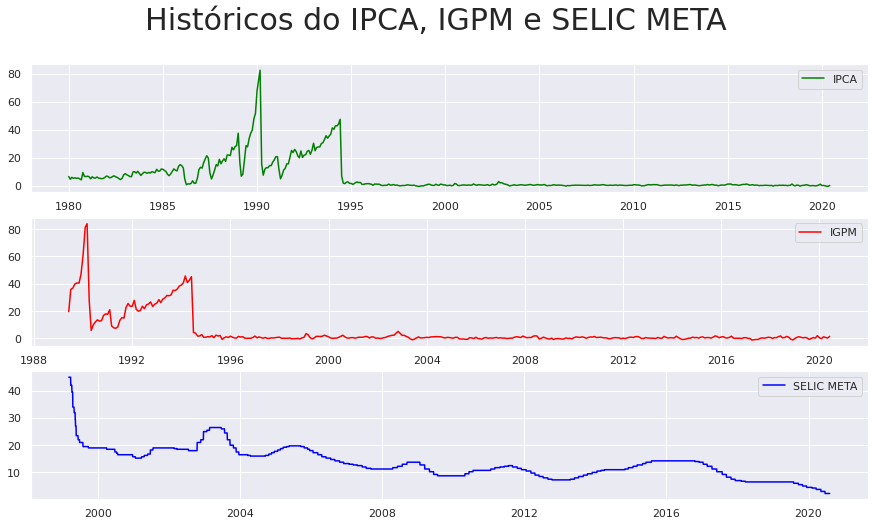

In [15]:
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)

fig_indic_bc, indic_bc_axes = plt.subplots(ncols=1, nrows=3, figsize=(15,8))

fig_indic_bc.suptitle('Históricos do IPCA, IGPM e SELIC META', size=30)

indic_bc_axes[0].plot(ipca, label='IPCA', color='green')
indic_bc_axes[0].legend()

indic_bc_axes[1].plot(igpm, label='IGPM', color='red')
indic_bc_axes[1].legend()

indic_bc_axes[2].plot(selic_meta, label='SELIC META', color='blue')
indic_bc_axes[2].legend();

> Importação da biblioteca Yahoo Finance para obter dataset da Ibovespa

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

> Importação e análise gráfica do CDI versus Ibovespa

[*********************100%***********************]  1 of 1 completed


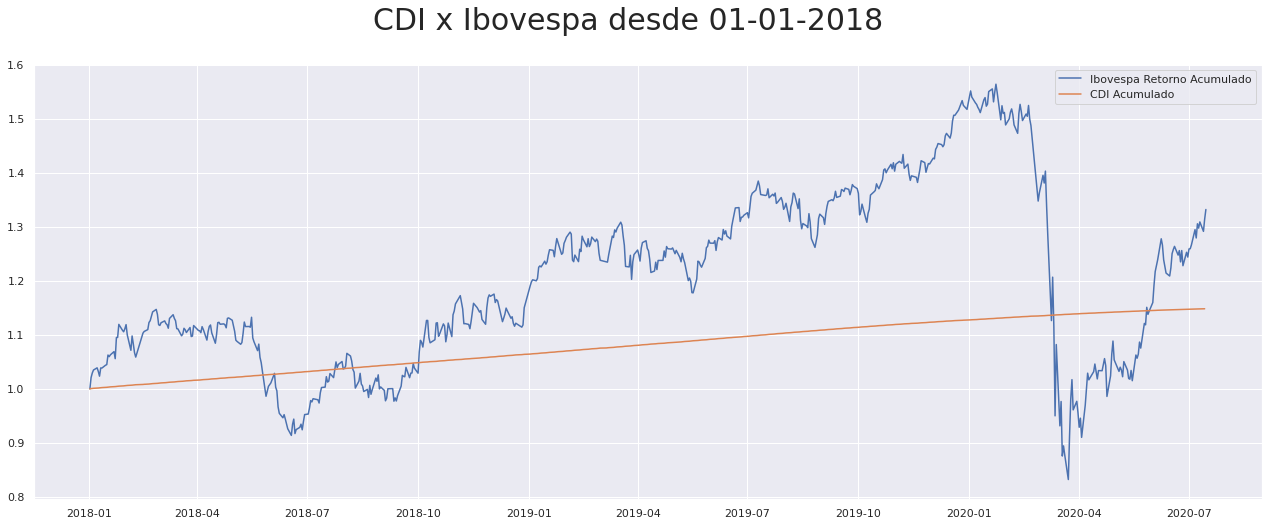

In [20]:
ibov = yf.download(tickers = '^BVSP')[['Adj Close']]
ibov_retorno = ibov.pct_change()
data_inicio = '2018-01-01'
ibov_retorno_acum = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acum.iloc[0] = 1

cdi = consulta_bc(12)
cdi_acum = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acum.iloc[0] = 1

fig, ax = plt.subplots()
fig.suptitle('CDI x Ibovespa desde 01-01-2018', size=30)
ax.plot(ibov_retorno_acum, label='Ibovespa Retorno Acumulado')
ax.plot(cdi_acum, label='CDI Acumulado')
plt.legend();